In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
#Data analysis and wrangling
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNetCV, ElasticNet
from xgboost import XGBRegressor, plot_importance 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))


In [3]:
# Load in the train and test datasets
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
#View first five rows of train and test; => See some NaN under PoolQC, Fence, MiscFeature
train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
#test 80 columns => See some NaN under PoolQC, Fence, MiscFeature
test.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH       80.000    11622   Pave   NaN      Reg   
1  1462          20       RL       81.000    14267   Pave   NaN      IR1   
2  1463          60       RL       74.000    13830   Pave   NaN      IR1   
3  1464          60       RL       78.000     9978   Pave   NaN      IR1   
4  1465         120       RL       43.000     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [6]:
#Dataset dimensions 
train.shape,test.shape

((1460, 81), (1459, 80))

In [7]:
#Data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
#count null for train and test =>LotFrontage missing 259
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
#=>LotFrontage missing 227
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [11]:
#rows contain at least one missing data
train[train.isnull().any(axis=1)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL       65.000     8450   Pave   NaN      Reg   
1        2          20       RL       80.000     9600   Pave   NaN      Reg   
2        3          60       RL       68.000    11250   Pave   NaN      IR1   
3        4          70       RL       60.000     9550   Pave   NaN      IR1   
4        5          60       RL       84.000    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL       62.000     7917   Pave   NaN      Reg   
1456  1457          20       RL       85.000    13175   Pave   NaN      Reg   
1457  1458          70       RL       66.000     9042   Pave   NaN      Reg   
1458  1459          20       RL       68.000     9717   Pave   NaN      Reg   
1459  1460          20       RL       75.000     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [12]:
#total number of rows with at least one missing data
train.isnull().any(axis = 1).sum()

1460

In [13]:
#Columns/variables with missing data
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [14]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(train)

Your selected dataframe has 81 columns and 1460 Rows.
There are 19 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
PoolQC                  0            1453             99.500   
MiscFeature             0            1406             96.300   
Alley                   0            1369             93.800   
Fence                   0            1179             80.800   
FireplaceQu             0             690             47.300   
LotFrontage             0             259             17.700   
GarageType              0              81              5.500   
GarageYrBlt             0              81              5.500   
GarageFinish            0              81              5.500   
GarageQual              0              81              5.500   
GarageCond              0              81              5.500   
BsmtExposure            0              38              2.600   
BsmtFinType2            0              38              2.600   
BsmtFinType1            0              37              2.500   
BsmtCond                0              37              2.500   
BsmtQual                0              37              2.500   
MasVnrArea            861               8              0.500   
MasVnrType              0               8              0.500   
Electrical              0               1              0.100   

              Total Zero Missing Values  % Total Zero Missing Values Data Type  
PoolQC                             1453                       99.500    object  
MiscFeature                        1406                       96.300    object  
Alley                              1369                       93.800    object  
Fence                              1179                       80.800    object  
FireplaceQu                         690                       47.300    object  
LotFrontage                         259                       17.700   float64  
GarageType                           81                        5.500    object  
GarageYrBlt                          81                        5.500   float64  
GarageFinish                         81                        5.500    object  
GarageQual                           81                        5.500    object  
GarageCond                           81                        5.500    object  
BsmtExposure                         38                        2.600    object  
BsmtFinType2                         38                        2.600    object  
BsmtFinType1                         37                        2.500    object  
BsmtCond                             37                        2.500    object  
BsmtQual                             37                        2.500    object  
MasVnrArea                          869                       59.500   float64  
MasVnrType                            8                        0.500    object  
Electrical                            1                        0.100    object

In [15]:
missing_zero_values_table(test)

Your selected dataframe has 80 columns and 1459 Rows.
There are 33 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
PoolQC                  0            1456             99.800   
MiscFeature             0            1408             96.500   
Alley                   0            1352             92.700   
Fence                   0            1169             80.100   
FireplaceQu             0             730             50.000   
LotFrontage             0             227             15.600   
GarageCond              0              78              5.300   
GarageYrBlt             0              78              5.300   
GarageQual              0              78              5.300   
GarageFinish            0              78              5.300   
GarageType              0              76              5.200   
BsmtCond                0              45              3.100   
BsmtExposure            0              44              3.000   
BsmtQual                0              44              3.000   
BsmtFinType1            0              42              2.900   
BsmtFinType2            0              42              2.900   
MasVnrType              0              16              1.100   
MasVnrArea            877              15              1.000   
MSZoning                0               4              0.300   
BsmtFullBath          849               2              0.100   
BsmtHalfBath         1364               2              0.100   
Functional              0               2              0.100   
Utilities               0               2              0.100   
GarageCars             76               1              0.100   
GarageArea             76               1              0.100   
TotalBsmtSF            41               1              0.100   
KitchenQual             0               1              0.100   
BsmtUnfSF             123               1              0.100   
BsmtFinSF2           1278               1              0.100   
BsmtFinSF1            462               1              0.100   
Exterior2nd             0               1              0.100   
Exterior1st             0               1              0.100   
SaleType                0               1              0.100   

              Total Zero Missing Values  % Total Zero Missing Values Data Type  
PoolQC                             1456                       99.800    object  
MiscFeature                        1408                       96.500    object  
Alley                              1352                       92.700    object  
Fence                              1169                       80.100    object  
FireplaceQu                         730                       50.000    object  
LotFrontage                         227                       15.600   float64  
GarageCond                           78                        5.300    object  
GarageYrBlt                          78                        5.300   float64  
GarageQual                           78                        5.300    object  
GarageFinish                         78                        5.300    object  
GarageType                           76                        5.200    object  
BsmtCond                             45                        3.100    object  
BsmtExposure                         44                        3.000    object  
BsmtQual                             44                        3.000    object  
BsmtFinType1                         42                        2.900    object  
BsmtFinType2                         42                        2.900    object  
MasVnrType                           16                        1.100    object  
MasVnrArea                          892                       61.100   float64  
MSZoning                              4                        0.300    object  
BsmtFullBath                        851                       58.300   float64  
BsmtHalfBath                       1366                       93.600   float64  
Functional                            2                

In [16]:
train[['PoolQC', 'SalePrice']].groupby(['PoolQC'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

PoolQC  SalePrice
0     Ex     490000
1     Fa     215500
2     Gd     201990

In [17]:
train.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [18]:
train.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

## High % of missing variables' definitions

PoolQC: Pool quality => NA means "No"
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
MiscVal: $Value of miscellaneous feature

MiscFeature: Miscellaneous feature not covered in other categories => NA means "No"
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
Fence: Fence quality => NA means "No"
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
Alley: Type of alley access to property => NA means "No"
       Grvl	    Gravel
       Pave	    Paved
       NA 	    No alley access
FireplaceQu: Fireplace quality => NA means "No"

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
All garage related variables NA => "No garage"

Basement related variables NA => "No basement"

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet


In [19]:
#Basic stats of data 38 columns (numeric data)
train.describe()

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count 1460.000    1460.000     1201.000   1460.000     1460.000     1460.000   
mean   730.500      56.897       70.050  10516.828        6.099        5.575   
std    421.610      42.301       24.285   9981.265        1.383        1.113   
min      1.000      20.000       21.000   1300.000        1.000        1.000   
25%    365.750      20.000       59.000   7553.500        5.000        5.000   
50%    730.500      50.000       69.000   9478.500        6.000        5.000   
75%   1095.250      70.000       80.000  11601.500        7.000        6.000   
max   1460.000     190.000      313.000 215245.000       10.000        9.000   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count   1460.000      1460.000    1452.000    1460.000  ...    1460.000   
mean    1971.268      1984.866     103.685     443.640  ...      94.245   
std       30.203        20.645     181.066     456.098  ...     125.339   
min     1872.000      1950.000       0.000       0.000  ...       0.000   
25%     1954.000      1967.000       0.000       0.000  ...       0.000   
50%     1973.000      1994.000       0.000     383.500  ...       0.000   
75%     2000.000      2004.000     166.000     712.250  ...     168.000   
max     2010.000      2010.000    1600.000    5644.000  ...     857.000   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
count     1460.000       1460.000   1460.000     1460.000  1460.000  1460.000   
mean        46.660         21.954      3.410       15.061     2.759    43.489   
std         66.256         61.119     29.317       55.757    40.177   496.123   
min          0.000          0.000      0.000        0.000     0.000     0.000   
25%          0.000          0.000      0.000        0.000     0.000     0.000   
50%         25.000          0.000      0.000        0.000     0.000     0.000   
75%         68.000          0.000      0.000        0.000     0.000     0.000   
max        547.000        552.000    508.000      480.000   738.000 15500.000   

        MoSold   YrSold  SalePrice  
count 1460.000 1460.000   1460.000  
mean     6.322 2007.816 180921.196  
std      2.704    1.328  79442.503  
min      1.000 2006.000  34900.000  
25%      5.000 2007.000 129975.000  
50%      6.000 2008.000 163000.000  
75%      8.000 2009.000 214000.000  
max     12.000 2010.000 755000.000  

[8 rows x 38 columns]

In [20]:
#categorical varaibles summary
train.describe(include=['O'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

# Drop high missing vars

In [21]:
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id'], axis=1, inplace=True)

In [22]:
test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

## Univariate analysis on target variable Sale Price
Sale price is skewed to the right, long right tail with high kutosis.


In [23]:
#Stats
train['SalePrice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

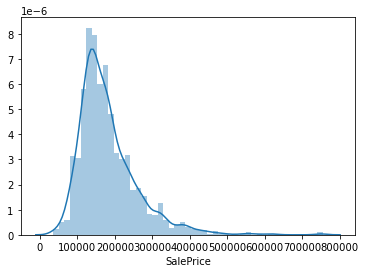

In [24]:
sns.distplot(train['SalePrice'])


 mu = 180921.20 and sigma = 79415.29



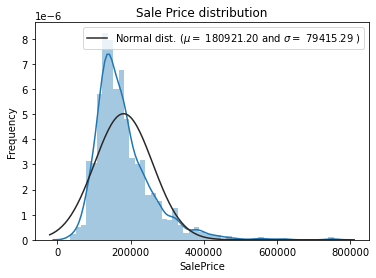

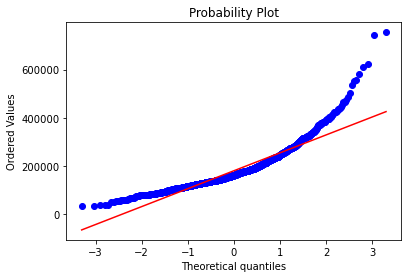

In [25]:
sns.distplot(train['SalePrice'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Sale Price distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show();

In [26]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


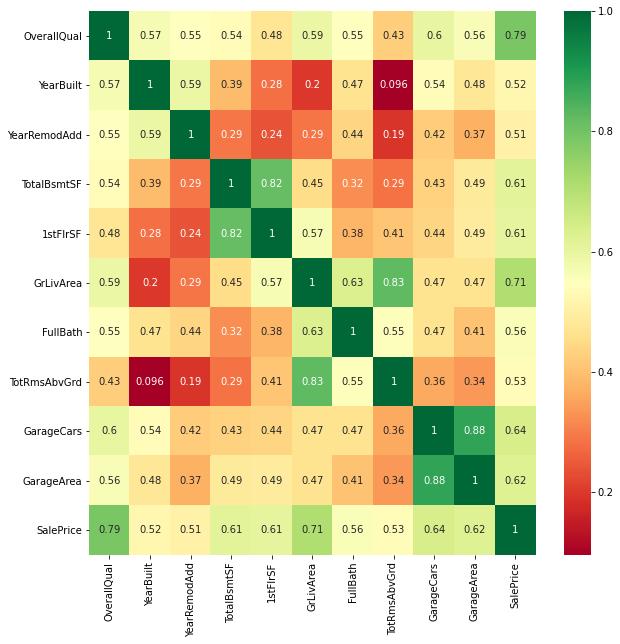

In [27]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

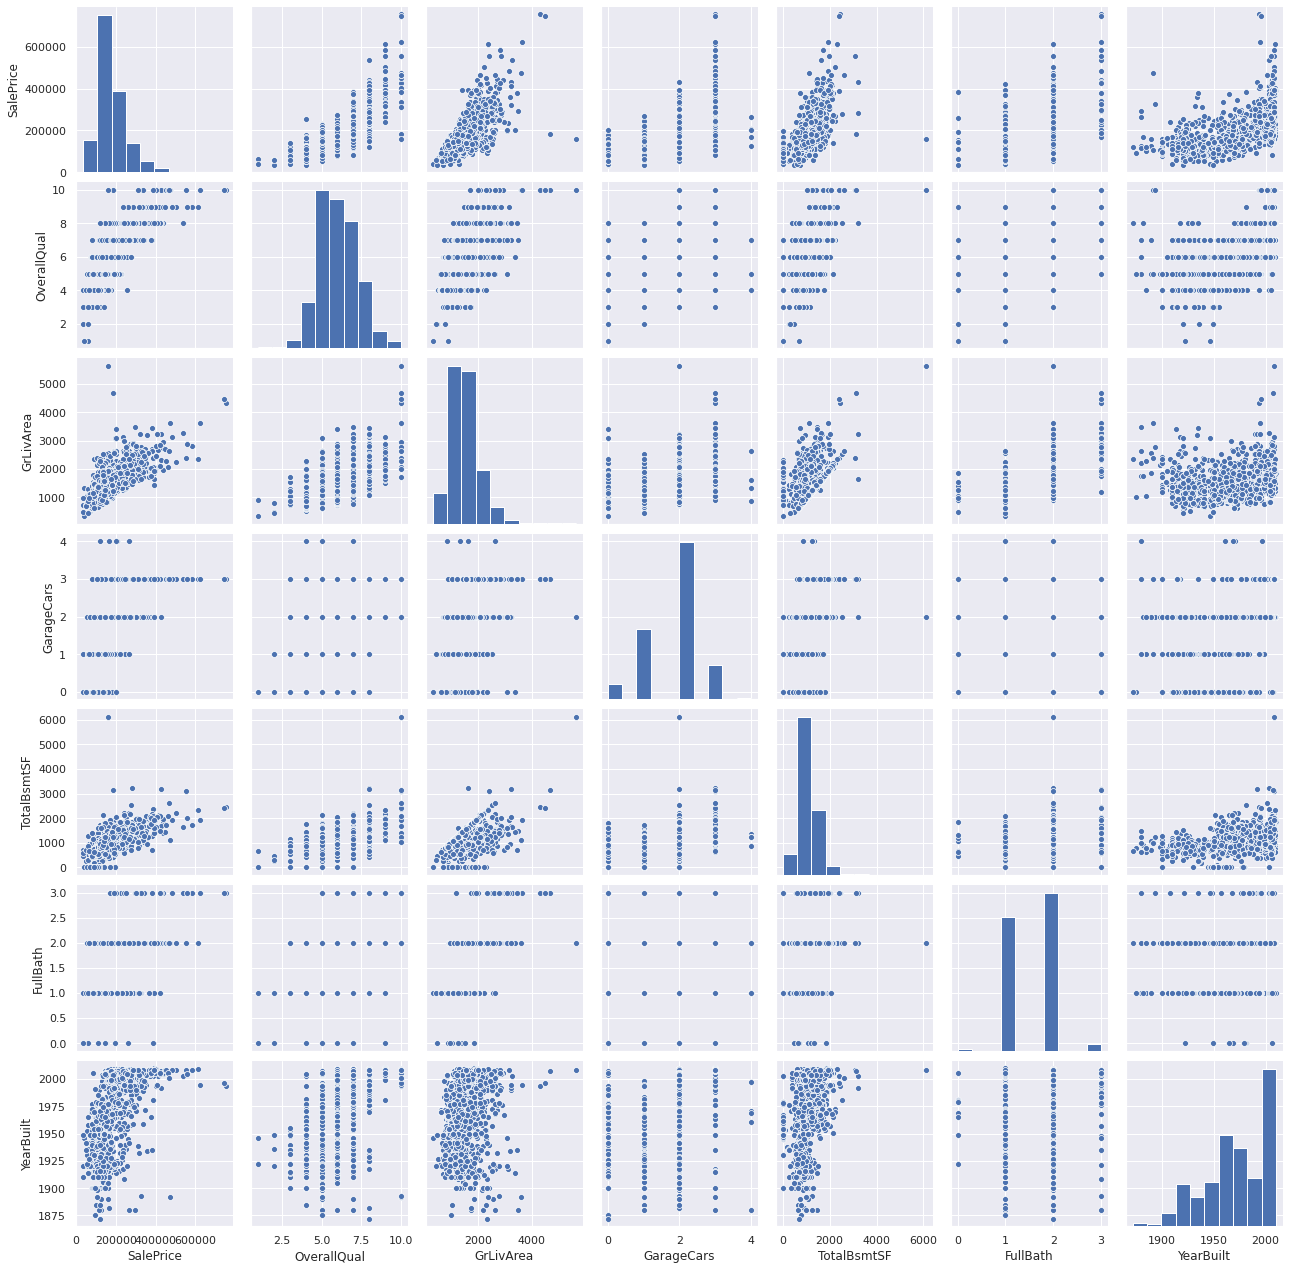

In [28]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [29]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 36
Categorical features : 39


In [30]:
# test data : Differentiate numerical features (minus the target) and categorical features
categorical_features = test.select_dtypes(include = ["object"]).columns
numerical_features = test.select_dtypes(exclude = ["object"]).columns

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
test_num = test[numerical_features]
test_cat = test[categorical_features]

Numerical features : 37
Categorical features : 39


In [31]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 348
Remaining NAs for numerical features in train : 0


In [32]:
#test Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in test : " + str(test_num.isnull().values.sum()))
test_num = test_num.fillna(test_num.median())
print("Remaining NAs for numerical features in test : " + str(test_num.isnull().values.sum()))

NAs for numerical features in test : 330
Remaining NAs for numerical features in test : 0


# Handle skewness of numerical variables

In [33]:
from scipy.stats import skew 
skewness = train_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal         24.452
PoolArea        14.813
LotArea         12.195
3SsnPorch       10.294
LowQualFinSF     9.002
KitchenAbvGr     4.484
BsmtFinSF2       4.251
ScreenPorch      4.118
BsmtHalfBath     4.099
EnclosedPorch    3.087
MasVnrArea       2.675
LotFrontage      2.407
OpenPorchSF      2.362
BsmtFinSF1       1.684
WoodDeckSF       1.540
TotalBsmtSF      1.523
MSSubClass       1.406
1stFlrSF         1.375
GrLivArea        1.365
BsmtUnfSF        0.919
2ndFlrSF         0.812
OverallCond      0.692
TotRmsAbvGrd     0.676
HalfBath         0.675
Fireplaces       0.649
BsmtFullBath     0.595
OverallQual      0.217
MoSold           0.212
BedroomAbvGr     0.212
GarageArea       0.180
YrSold           0.096
FullBath         0.037
GarageCars      -0.342
YearRemodAdd    -0.503
YearBuilt       -0.613
GarageYrBlt     -0.678
dtype: float64

In [34]:
skewness_t = test_num.apply(lambda x: skew(x))
skewness_t.sort_values(ascending=False)

PoolArea        20.176
MiscVal         20.055
LowQualFinSF    16.151
3SsnPorch       12.511
EnclosedPorch    4.664
KitchenAbvGr     4.075
BsmtFinSF2       4.039
ScreenPorch      3.784
BsmtHalfBath     3.779
LotArea          3.112
OpenPorchSF      2.685
MasVnrArea       2.547
WoodDeckSF       2.129
1stFlrSF         1.557
MSSubClass       1.345
BsmtFinSF1       1.165
GrLivArea        1.129
BsmtUnfSF        0.920
2ndFlrSF         0.912
TotRmsAbvGrd     0.842
Fireplaces       0.819
TotalBsmtSF      0.813
LotFrontage      0.754
HalfBath         0.714
BsmtFullBath     0.651
OverallCond      0.449
BedroomAbvGr     0.436
GarageArea       0.300
FullBath         0.296
MoSold           0.183
OverallQual      0.181
YrSold           0.169
Id               0.000
GarageCars      -0.108
GarageYrBlt     -0.171
YearRemodAdd    -0.399
YearBuilt       -0.587
dtype: float64

In [35]:
skewness = skewness[abs(skewness)>0.5]
skewness.index
skew_features = train[skewness.index]
skew_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [36]:
skewness_t = skewness[abs(skewness)>0.5]
skewness_t.index
skew_features_t = test[skewness.index]
skew_features_t.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [37]:
#we can treat skewness of a feature with the help fof log transformation.so we'll apply the same here.
skew_features = np.log1p(skew_features)

In [38]:
#test we can treat skewness of a feature with the help fof log transformation.so we'll apply the same here.
skew_features_t = np.log1p(skew_features_t)

In [39]:
skewnessx = skew_features.apply(lambda x: skew(x))
skewnessx.sort_values(ascending=False)

PoolArea        14.348
3SsnPorch        7.727
LowQualFinSF     7.453
MiscVal          5.165
BsmtHalfBath     3.929
KitchenAbvGr     3.865
ScreenPorch      3.147
BsmtFinSF2       2.521
EnclosedPorch    2.110
HalfBath         0.566
BsmtFullBath     0.419
2ndFlrSF         0.289
MSSubClass       0.249
Fireplaces       0.182
WoodDeckSF       0.153
1stFlrSF         0.080
GrLivArea       -0.006
OpenPorchSF     -0.023
TotRmsAbvGrd    -0.058
LotArea         -0.137
OverallCond     -0.254
YearRemodAdd    -0.510
BsmtFinSF1      -0.618
YearBuilt       -0.640
BsmtUnfSF       -2.184
TotalBsmtSF     -5.149
LotFrontage        nan
MasVnrArea         nan
GarageYrBlt        nan
dtype: float64

In [40]:
skewnessx_t = skew_features_t.apply(lambda x: skew(x))
skewnessx_t.sort_values(ascending=False)

PoolArea        15.705
3SsnPorch       10.533
LowQualFinSF    10.308
MiscVal          5.257
KitchenAbvGr     3.147
ScreenPorch      2.769
EnclosedPorch    1.826
HalfBath         0.596
2ndFlrSF         0.321
Fireplaces       0.294
MSSubClass       0.242
WoodDeckSF       0.163
TotRmsAbvGrd     0.134
1stFlrSF         0.053
GrLivArea        0.028
OpenPorchSF     -0.060
YearRemodAdd    -0.406
YearBuilt       -0.612
LotArea         -0.915
OverallCond     -1.160
LotFrontage        nan
MasVnrArea         nan
BsmtFinSF1         nan
BsmtFinSF2         nan
BsmtUnfSF          nan
TotalBsmtSF        nan
BsmtFullBath       nan
BsmtHalfBath       nan
GarageYrBlt        nan
dtype: float64

In [41]:
# Create dummy features for categorical values via one-hot encoding
train_cat.shape 
train_cat = pd.get_dummies(train_cat)
train_cat.shape

(1460, 239)

In [42]:
# test Create dummy features for categorical values via one-hot encoding

test_cat = pd.get_dummies(test_cat)
test_cat.shape

(1459, 223)

In [43]:
train_cat.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0            0            1             0             0             0  ...   
1            0            1             0             0             0  ...   
2            0            1             1             0             0  ...   
3            0            1             1             0             0  ...   
4            0            1             1             0             0  ...   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 239 columns]

In [44]:
str(train_cat.isnull().values.sum())

'0'

# Predictive Modeling

In [45]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from xgboost import XGBRegressor

Now after transformation(preprocessing) we'll join num and cat get the whole train set back.

In [46]:
train.SalePrice = np.log1p(train.SalePrice )
y = train.SalePrice

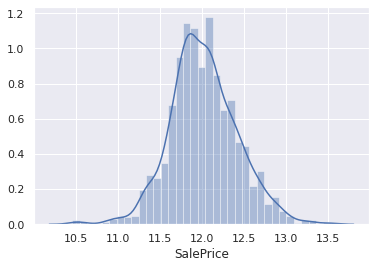

In [47]:
sns.distplot(y)


 mu = 12.02 and sigma = 0.40



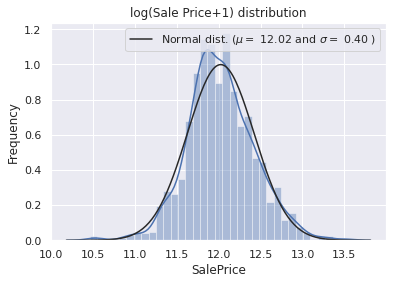

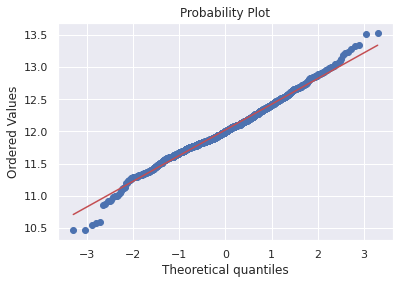

In [48]:
sns.distplot(y , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('log(Sale Price+1) distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show();

In [49]:
train = pd.concat([train_cat,train_num],axis=1)
train.shape

(1460, 275)

In [50]:
test_new = pd.concat([test_cat,test_num],axis=1)
test_new.shape

(1459, 260)

In [51]:
#test vars from test dataset
cols_t = test_new.columns.values.tolist()

In [52]:
#select train variables exist in test dataset
train = train[train.columns.intersection(cols_t)]

In [53]:
train.shape

(1460, 259)

In [54]:
#split the data to train the model 
X_train,X_test,y_train,y_test = train_test_split(train,y,test_size = 0.3,random_state= 0)

In [55]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 259), (438, 259), (1022,), (438,))

# Feature selection
https://machinelearningmastery.com/feature-selection-for-regression-data/

The scikit-learn machine library provides an implementation of the correlation statistic in the f_regression() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

Feature 0: 0.017292
Feature 1: 0.029037
Feature 2: 0.005578
Feature 3: 0.059633
Feature 4: 0.068973
Feature 5: 0.000000
Feature 6: 0.000000
Feature 7: 0.057831
Feature 8: 0.011718
Feature 9: 0.002900
Feature 10: 0.063029
Feature 11: 0.011160
Feature 12: 0.002808
Feature 13: 0.001744
Feature 14: 0.005241
Feature 15: 0.012673
Feature 16: 0.000000
Feature 17: 0.016393
Feature 18: 0.000888
Feature 19: 0.000000
Feature 20: 0.021344
Feature 21: 0.001289
Feature 22: 0.005748
Feature 23: 0.000000
Feature 24: 0.005910
Feature 25: 0.000000
Feature 26: 0.014548
Feature 27: 0.010267
Feature 28: 0.003788
Feature 29: 0.047505
Feature 30: 0.005912
Feature 31: 0.029305
Feature 32: 0.048724
Feature 33: 0.027543
Feature 34: 0.012619
Feature 35: 0.021372
Feature 36: 0.059057
Feature 37: 0.009679
Feature 38: 0.023567
Feature 39: 0.054349
Feature 40: 0.071893
Feature 41: 0.024849
Feature 42: 0.004587
Feature 43: 0.024755
Feature 44: 0.018597
Feature 45: 0.035991
Feature 46: 0.003328
Feature 47: 0.012824
Fe

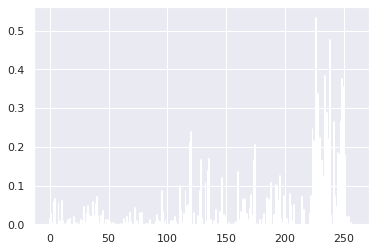

In [56]:
# example of mutual information feature selection for numerical input data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k=88)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform validation input data
    X_test_fs = fs.transform(X_test)
            
    cols = fs.get_support(indices=True)
    X_train_new = X_train.iloc[:,cols]
    X_test_new = X_test.iloc[:,cols]
    
    
    return X_train_fs, X_test_fs, fs, cols, X_train_new, X_test_new


# feature selection
#_, _, fs,  X_train_new, X_test_new = select_features(X_train, y_train, X_test)
X_train_fs, X_test_fs, fs, cols, X_train_new, X_test_new = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [57]:
#get selected cols
cols_t_fs = X_train_new.columns.values.tolist()

In [58]:
len(cols_t_fs)

88

In [59]:
#apply to test dataset
test_new = test_new[test_new.columns.intersection(cols_t_fs)]

In [60]:
test_new.head()

MSZoning_FV  MSZoning_RL  MSZoning_RM  LotShape_IR1  LotShape_Reg  \
0            0            0            0             0             1   
1            0            1            0             1             0   
2            0            1            0             1             0   
3            0            1            0             1             0   
4            0            1            0             1             0   

   Neighborhood_CollgCr  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_NAmes  ...  FullBath  HalfBath  \
0                    0                   1  ...         1         0   
1                    0                   1  ...         1         1   
2                    0                   0  ...         2         1   
3                    0                   0  ...         2         1   
4                    0                   0  ...         2         0   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             2             5           0     1961.000       1.000   
1             3             6           0     1958.000       1.000   
2             3             6           1     1997.000       2.000   
3             3             7           1     1998.000       2.000   
4             2             5           0     1992.000       2.000   

   GarageArea  WoodDeckSF  OpenPorchSF  
0     730.000         140            0  
1     312.000         393           36  
2     482.000         212           34  
3     470.000         360           36  
4     506.000           0           82  

[5 rows x 88 columns]

In [61]:
#Tune # of vars
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X_train.shape[1]-20, X_train.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X_train, y_train)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Best MAE: -42668.279
Best Config: {'sel__k': 248}
>-115226.256 with: {'sel__k': 239}
>-863961.035 with: {'sel__k': 240}
>-3341516.147 with: {'sel__k': 241}
>-139775499355.675 with: {'sel__k': 242}
>-3981746.090 with: {'sel__k': 243}
>-502804.852 with: {'sel__k': 244}
>-1168286.059 with: {'sel__k': 245}
>-49944203798.155 with: {'sel__k': 246}
>-1878279.720 with: {'sel__k': 247}
>-42668.279 with: {'sel__k': 248}
>-113201881.671 with: {'sel__k': 249}
>-229836980226.614 with: {'sel__k': 250}
>-116501856341.653 with: {'sel__k': 251}
>-49558523484.692 with: {'sel__k': 252}
>-2769898.260 with: {'sel__k': 253}
>-309762903339.722 with: {'sel__k': 254}
>-9847500841.335 with: {'sel__k': 255}
>-522209146247.038 with: {'sel__k': 256}
>-14760536719.834 with: {'sel__k': 257}
>-7571725279.083 with: {'sel__k': 258}
>-176961954450.735 with: {'sel__k': 259}


In [62]:
# fit the model
from sklearn.metrics import mean_absolute_error,mean_squared_error
model = LinearRegression()
model.fit(X_train_new, y_train)
# evaluate the model
yhat = model.predict(X_test_new)
# evaluate predictions
test_mae = mean_absolute_error(y_test, yhat)
test_mse = mean_squared_error(y_test, yhat)
print('Test MAE: %.3f' % test_mae)
test_rmse = np.sqrt(test_mse)
print('Test RMSE: %.4f' % test_rmse)

Test MAE: 0.097
Test RMSE: 0.1726


In [63]:
# All vars

#fit multiple linear regression
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)
test_rmse = np.sqrt(mse)
print('test_rmse: %.3f' % test_rmse)
print('test_mae: %.3f' % mae)
#test_rmse = np.sqrt(mae)

test_rmse: 1377.615
test_mae: 108.877


In [64]:
#ElasticNet
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=1e-3, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=0)
               
cv_model.fit(X_train_fs, y_train)
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00018910
Optimal l1_ratio: 0.500
Number of iterations 75


In [65]:
#Model evaluation
y_train_pred = cv_model.predict(X_train_new)
y_pred = cv_model.predict(X_test_new)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_pred, y_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_pred, y_test)
print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % test_rmse)
print('Test MAE: %.4f' % test_mae)

Train r2 score:  0.883600154361477
Test r2 score:  0.8174770267276587
Train RMSE: 0.1262
Test RMSE: 0.1679
Test MAE: 0.0936


65 features, reduction of 26.14%


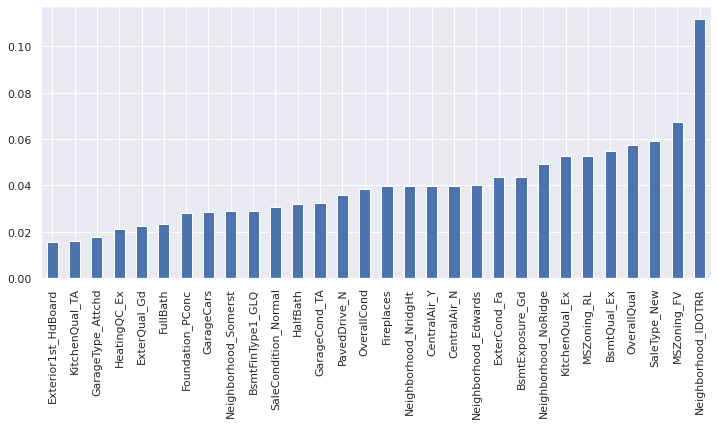

In [66]:
feature_importance = pd.Series(index = X_train_new.columns, data = np.abs(cv_model.coef_))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (12,5));

In [67]:
xgb_model1 = XGBRegressor()
xgb_model1.fit(X_train_new, y_train, verbose=False)
y_train_pred1 = xgb_model1.predict(X_train_new)
y_pred1 = xgb_model1.predict(X_test_new)

print('Train r2 score: ', r2_score(y_train_pred1, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, y_train)
test_mse1 = mean_squared_error(y_pred1, y_test)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
test_mae1 = mean_absolute_error(y_pred1, y_test)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)
print('Test MAE: %.4f' % test_mae1)

Train r2 score:  0.9997907392299357
Test r2 score:  0.8836633728239849
Train RMSE: 0.0058
Test RMSE: 0.1341
Test MAE: 0.0950


In [68]:
#np.exp and calculate on array. math.exp can only calculate on one number
print(np.exp(y_pred1))

[237897.19  123116.016 106865.336 225543.69   88189.59  119990.234
 239509.58  125895.8   426497.88  161821.69  212137.67  148547.77
 232175.42  126848.48  131435.94  143256.6   230955.5   100921.234
 139251.66  159109.86  111690.56  146856.89   90093.79  144255.75
 169156.72  209392.25  172743.9    78355.13  300969.22  109368.69
 132029.05  208683.34  140595.12  290690.2   343780.25  183316.94
 288993.84  118054.73  227539.3   327830.66  220658.97  119736.58
 176919.89  314255.56  377714.2   117349.914 135696.92  128918.086
 171137.95   90292.83  398934.3   146450.47  158213.52   84131.76
 260018.42  104911.766 138867.19  229236.66  144677.89  100263.44
 144061.22  133424.55  134491.39  164273.95  210672.17  117781.805
 137684.19  237881.97  132296.25  206342.8   179419.47  121428.38
  85264.12  235495.2    83880.76  254498.22  130289.17   98152.34
 276308.97  157641.03  118963.516 133950.08  128655.49  136533.16
 261157.61  183430.42   78252.16  198137.62  163916.81  138436.
 193388.

[3.92257032e-04 5.54928090e-03 2.47480515e-02 6.28237496e-04
 3.25998617e-03 6.65913569e-04 3.61334183e-03 3.19091661e-04
 2.13353299e-02 3.02283163e-03 8.03915143e-04 4.18322394e-04
 2.90344283e-03 2.11223052e-03 3.72660754e-04 9.05719819e-04
 7.68218189e-04 1.86989480e-03 7.03323691e-04 4.78703441e-04
 1.07750129e-04 8.20484944e-04 2.78492051e-04 1.49980973e-04
 9.46605520e-04 4.18588798e-03 2.26564985e-03 1.73686538e-03
 7.37026101e-03 6.80587254e-04 5.84499285e-05 5.13727702e-02
 1.42264832e-03 1.60339742e-03 2.27223267e-03 1.14595983e-03
 2.74692615e-03 1.35934635e-04 1.16570771e-03 1.05613330e-03
 1.01202853e-01 0.00000000e+00 3.96855205e-04 1.49230810e-03
 7.11786887e-03 1.54840825e-02 5.78500214e-04 7.72881031e-04
 1.62108394e-03 4.14149195e-04 9.25433589e-04 1.90247856e-02
 1.03264321e-02 9.04092798e-04 1.07407756e-03 1.92943984e-03
 1.63447484e-03 2.01587547e-02 4.61316435e-03 3.62323923e-03
 1.01196049e-02 1.52005313e-03 1.31605531e-03 0.00000000e+00
 2.73917429e-03 2.635350

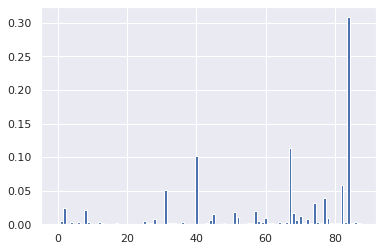

In [69]:
# feature importance
print(xgb_model1.feature_importances_)
# plot
pyplot.bar(range(len(xgb_model1.feature_importances_)), xgb_model1.feature_importances_)
pyplot.show()

In [70]:
from collections import OrderedDict
OrderedDict(sorted(xgb_model1.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

OrderedDict([('LotArea', 262),
             ('GarageArea', 216),
             ('BsmtUnfSF', 193),
             ('GrLivArea', 182),
             ('LotFrontage', 172),
             ('BsmtFinSF1', 153),
             ('TotalBsmtSF', 136),
             ('1stFlrSF', 135),
             ('YearBuilt', 113),
             ('MasVnrArea', 111),
             ('YearRemodAdd', 101),
             ('OverallQual', 97),
             ('OpenPorchSF', 92),
             ('LotShape_IR1', 91),
             ('GarageYrBlt', 89),
             ('WoodDeckSF', 81),
             ('2ndFlrSF', 61),
             ('MSZoning_RL', 58),
             ('MSSubClass', 54),
             ('OverallCond', 50),
             ('TotRmsAbvGrd', 45),
             ('RoofStyle_Gable', 44),
             ('Neighborhood_NAmes', 37),
             ('Neighborhood_Edwards', 34),
             ('LotShape_Reg', 34),
             ('BedroomAbvGr', 30),
             ('MasVnrType_BrkFace', 30),
             ('HouseStyle_2Story', 30),
             ('SaleC

In [71]:
y_test_pred = np.exp(xgb_model1.predict(test_new))
print(y_test_pred)

print(y_test_pred.shape)


[126590.12 155552.2  188784.44 ... 149660.17 112730.81 226716.86]
(1459,)


In [72]:
prediction = pd.DataFrame(y_test_pred, columns=['SalePrice'])
result = pd.concat([test['Id'], prediction], axis=1)

result.columns

Index(['Id', 'SalePrice'], dtype='object')

In [73]:
# ----------------------------- Create File to Submit --------------------------------
result.to_csv('./Predictions.csv', index=False)
result.head()

Id  SalePrice
0  1461 126590.117
1  1462 155552.203
2  1463 188784.438
3  1464 190442.281
4  1465 183282.844